In [ ]:
import numpy as np
import pandas as pd
import os
import random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as  sns
import cv2 
import tensorflow 

from keras.preprocessing.image import ImageDataGenerator 
%matplotlib inline

In [ ]:
TrainingImagePath= '/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/train'
TestingImagePath= '/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/test'
ValidationImagePath= '/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/val'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
# generating traning data
training_set= train_datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(40,40),
    batch_size=32,
    class_mode='categorical')

# generating testing data
test_set= test_datagen.flow_from_directory(
    TestingImagePath,
    target_size=(40,40),
    batch_size=32,
    class_mode='categorical')

# generating validate data
valid_set= test_datagen.flow_from_directory(
    ValidationImagePath,
    target_size=(40,40),
    batch_size=32,
    class_mode='categorical')


Found 18044 images belonging to 23 classes.
Found 2599 images belonging to 23 classes.
Found 5149 images belonging to 23 classes.


In [ ]:
def showImages(class_name):
  random_index= random.choice(list(range(1,49)))
  folder_path=os.path.join(TrainingImagePath,class_name)
  try:
    image_path=os.path.join(folder_path)
    plt.imshow(mpimg.imread(image_path))
  except:
    files=os.listdir(folder_path)
    image_path=os.path.join(folder_path,random.choice(files))
    plt.imshow(mpimg.imread(image_path))
  plt.title(class_name)
  plt.axis(False)


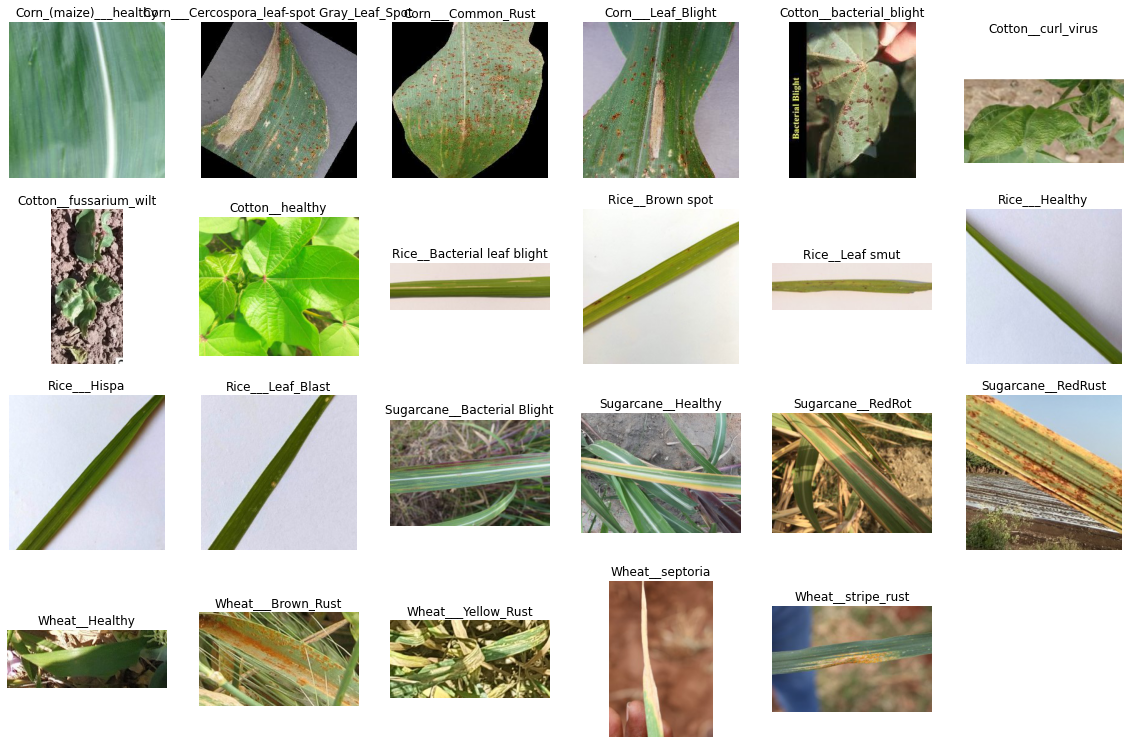

In [ ]:
plt.figure(figsize=(20,20))
for labels , number in training_set.class_indices.items():
  plt.subplot(6,6, number+1)
  showImages(labels)




In [ ]:
test_set.class_indices

{'Corn_(maize)___healthy': 0,
 'Corn___Cercospora_leaf-spot Gray_Leaf_Spot': 1,
 'Corn___Common_Rust': 2,
 'Corn___Leaf_Blight': 3,
 'Cotton__bacterial_blight': 4,
 'Cotton__curl_virus': 5,
 'Cotton__fussarium_wilt': 6,
 'Cotton__healthy': 7,
 'Rice__Bacterial leaf blight': 8,
 'Rice__Brown spot': 9,
 'Rice__Leaf smut': 10,
 'Rice___Healthy': 11,
 'Rice___Hispa': 12,
 'Rice___Leaf_Blast': 13,
 'Sugarcane__Bacterial Blight': 14,
 'Sugarcane__Healthy': 15,
 'Sugarcane__RedRot': 16,
 'Sugarcane__RedRust': 17,
 'Wheat__Healthy': 18,
 'Wheat___Brown_Rust': 19,
 'Wheat___Yellow_Rust': 20,
 'Wheat__septoria': 21,
 'Wheat__stripe_rust': 22}

In [ ]:
TrainClasses= training_set.class_indices

ResultMap={}
for cropsDiseaseValue, cropDiseaseName in zip(TrainClasses.values(),TrainClasses.keys()):
  ResultMap[cropsDiseaseValue]= cropDiseaseName

import pickle
with open(R'/content/drive/MyDrive/Colab Notebooks/lvy pro/ResultMap.pkl','wb')as f:
  pickle.dump(ResultMap, f , pickle.HIGHEST_PROTOCOL)

print('Mapping of pace and its ID', ResultMap)

OutputNeurons=len(ResultMap)
print('\nThe number of output neurons--', OutputNeurons)


Mapping of pace and its ID {0: 'Corn_(maize)___healthy', 1: 'Corn___Cercospora_leaf-spot Gray_Leaf_Spot', 2: 'Corn___Common_Rust', 3: 'Corn___Leaf_Blight', 4: 'Cotton__bacterial_blight', 5: 'Cotton__curl_virus', 6: 'Cotton__fussarium_wilt', 7: 'Cotton__healthy', 8: 'Rice__Bacterial leaf blight', 9: 'Rice__Brown spot', 10: 'Rice__Leaf smut', 11: 'Rice___Healthy', 12: 'Rice___Hispa', 13: 'Rice___Leaf_Blast', 14: 'Sugarcane__Bacterial Blight', 15: 'Sugarcane__Healthy', 16: 'Sugarcane__RedRot', 17: 'Sugarcane__RedRust', 18: 'Wheat__Healthy', 19: 'Wheat___Brown_Rust', 20: 'Wheat___Yellow_Rust', 21: 'Wheat__septoria', 22: 'Wheat__stripe_rust'}

The number of output neurons-- 23


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

classifier= Sequential()

classifier.add(Convolution2D(32, kernel_size=(3,3), input_shape=(40,40,3),activation='relu'))

classifier.add(Convolution2D(100, kernel_size=(3,3), strides=(1,1),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(150, kernel_size=(3,3),strides=(1,1), activation='relu'))


# classifier.add(Convolution2D(200, kernel_size=(3,3),strides=(1,1),activation='relu'))
# classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(200,kernel_size=(3,3),strides=(1,1),activation='relu'))

classifier.add(Convolution2D(250,kernel_size=(3,3),strides=(1,1),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(256,activation='relu'))
classifier.add(Dense(64,activation='relu'))

classifier.add(Dense(OutputNeurons,activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])




In [ ]:
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPool2D
# from keras.layers import Flatten
# from keras.layers import Dense

# classifier= Sequential()

# classifier.add(Convolution2D(32,kernel_size=(3,3), strides=(1,1),input_shape=(128,128,3),activation='relu'))


# classifier.add(MaxPool2D(pool_size=(2,2)))

# classifier.add(Convolution2D(64,kernel_size=(3,3),strides=(1,1), activation='relu'))

# classifier.add(MaxPool2D(pool_size=(2,2)))

# classifier.add(Flatten())

# classifier.add(Dense(256,activation='relu'))

# classifier.add(Dense(OutputNeurons,activation='softmax'))

# classifier.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 36, 36, 100)       28900     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 100)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 150)       135150    
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 200)       270200    
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 250)       450250    
                                                      

In [ ]:

import time

StartTime=time.time()

model_history=classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=5,
    validation_data=valid_set,
    validation_steps=len(valid_set),
    verbose=1
    )

EndTime= time.time()
print('///////////////////////// total time taken --', round((EndTime-StartTime)/60), ' minutes ///////')

Epoch 1/5
564/564 [==============================] - 5515s 10s/step - loss: 1.5621 - accuracy: 0.5132 - val_loss: 0.9351 - val_accuracy: 0.6986
Epoch 2/5
564/564 [==============================] - 611s 1s/step - loss: 0.8797 - accuracy: 0.7203 - val_loss: 0.9119 - val_accuracy: 0.7223
Epoch 3/5
564/564 [==============================] - 609s 1s/step - loss: 0.6925 - accuracy: 0.7819 - val_loss: 0.5390 - val_accuracy: 0.8227
Epoch 4/5
564/564 [==============================] - 606s 1s/step - loss: 0.6181 - accuracy: 0.8038 - val_loss: 0.6028 - val_accuracy: 0.8106
Epoch 5/5
564/564 [==============================] - 611s 1s/step - loss: 0.5575 - accuracy: 0.8239 - val_loss: 0.5461 - val_accuracy: 0.8202
///////////////////////// total time taken -- 133  minutes ///////


In [ ]:
accuracy= model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

loss=model_history.history['loss']
val_loss=model_history.history['val_loss']


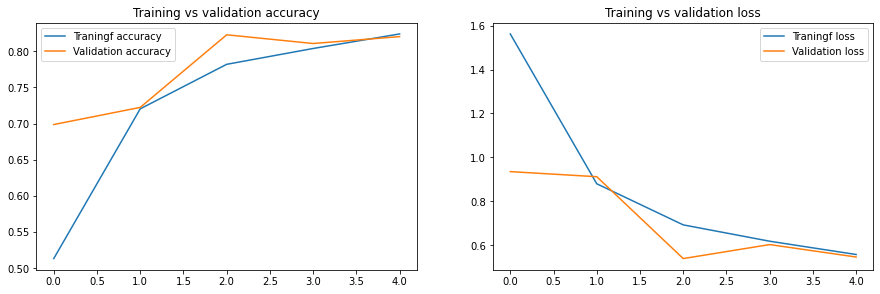

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(accuracy,label='Traningf accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.title('Training vs validation accuracy')


plt.subplot(2,2,2)
plt.plot(loss,label='Traningf loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.title('Training vs validation loss')

plt.show()


In [ ]:
classifier.save('/content/drive/MyDrive/Colab Notebooks/lvy pro/classifier.pkl')


In [ ]:
from tensorflow.keras.models import Model
classifier.save('/content/drive/MyDrive/Colab Notebooks/lvy pro/model-h5/model-v4.h5') 

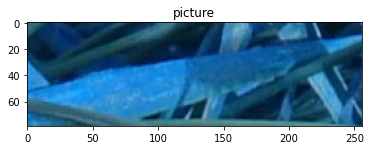

//////////////////////////////////////////////////////////////////////////////////////////////////////////////
Prediction is--  Wheat___Brown_Rust


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

testImage='/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/test/Wheat___Brown_Rust/Brown_rust996.jpg'
test_image=load_img(testImage,target_size=(40,40))
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img=cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()

print('///////////'*10)
print('Prediction is-- ',ResultMap[np.argmax(result)])


In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,40,40,3)
  prediction=classifier.predict(img_3d ,verbose=0)[0]
  return ResultMap[np.argmax(result)]

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 22.7 MB/s 
     |████████████████████████████████| 106 kB 49.7 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 278 kB 61.8 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 213 kB 47.8 MB/s 
     |████████████████████████████████| 2.3 MB 46.1 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 6.6 MB/s 
     |████████████████████████████████| 68 kB 6.2 MB/s 
     |████████████████████████████████| 68 kB 6.2 MB/s 
     |████████████████████████████████| 68 kB 6.2 MB/s 
     |████████████████████████████████| 68 kB 6.4 

In [ ]:
class_names = ['Cotton__bacterial_blight',
 'Corn_(maize)___healthy',
 'Cotton__curl_virus',
 'Cotton__fussarium_wilt',
 'Cotton__healthy',
 'Corn___Cercospora_leaf-spot Gray_Leaf_Spot',
 'Rice___Healthy',
 'Rice___Hispa',
 'Sugarcane__RedRust',
 'Sugarcane__Bacterial Blight',
 'Rice___Leaf_Blast',
 'Rice__Bacterial leaf blight',
 'Corn___Common_Rust',
 'Sugarcane__Healthy',
 'Rice__Brown spot',
 'Rice__Leaf smut',
 'Sugarcane__RedRot',
 'Corn___Leaf_Blight',
 'Wheat___Brown_Rust',
 'Wheat___Yellow_Rust',
 'Wheat__Healthy',
 'Wheat__septoria',
 'Wheat__stripe_rust']

In [ ]:
import gradio as gr
image = gr.inputs.Image(shape=(40,40))
label = gr.outputs.Label(num_top_classes=9)



app = gr.Interface(fn=predict_image, inputs=image, outputs=label)

app.launch(share=True,debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://cd6c450b502fde06.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.
